In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('../data/test_predictions_with_controllable_delay.csv')

In [3]:
df

,year,month,carrier,airport,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,...,carrier_delay_ewma,weather_delay_ewma,nas_delay_ewma,security_delay_ewma,late_aircraft_delay_ewma,past_years_monthly_ewma,is_covid_year,predicted_arr_delay,controllable_ratio_2022,predicted_controllable_delay
0,2023,1,9E,ABE,14.0,1.0,0.00,1.00,0.00,0.00,...,229.284482,9.285838,77.758731,3.906250e-01,33.093488,381.250000,0,442.254977,0.519928,229.940540
1,2023,5,9E,ABE,68.0,0.0,0.00,0.00,0.00,0.00,...,114.642241,328.142919,39.379365,1.953125e-01,16.546744,298.875000,0,464.761239,0.984314,457.470865
2,2023,6,9E,ABE,86.0,15.0,6.03,2.23,4.12,0.00,...,57.321121,164.071459,19.689683,9.765625e-02,8.273372,1040.812500,0,602.573777,0.932005,561.601585
3,2023,7,9E,ABE,86.0,9.0,6.00,0.00,1.00,0.00,...,167.660560,152.535730,85.344841,4.882812e-02,115.636686,335.250000,0,683.797752,0.759690,519.474257
4,2023,8,9E,ABE,89.0,13.0,2.25,1.60,3.16,0.00,...,198.830280,76.267865,68.672421,2.441406e-02,104.318343,812.250000,0,563.714570,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22564,2023,12,OO,YUM,121.0,15.0,7.27,1.67,3.15,0.00,...,514.831610,366.586178,439.833534,6.968172e-21,173.580895,1255.609375,0,1857.934130,0.644343,1197.147413
22565,2023,1,YV,YUM,52.0,3.0,1.00,0.00,0.00,0.00,...,53.475058,0.070000,9.220415,4.577637e-05,159.945000,889.250000,0,367.854565,0.959962,353.126355
22566,2023,2,YV,YUM,30.0,8.0,1.33,0.00,2.67,0.00,...,102.237529,0.035000,4.610207,2.288818e-05,195.472500,734.500000,0,407.020223,0.907654,369.433497
22567,2023,3,YV,YUM,31.0,10.0,0.70,0.00,0.86,0.19,...,68.118765,0.017500,29.805104,1.144409e-05,497.236250,625.250000,0,481.675057,0.789773,380.413821


Carrier: 9E
Controllable Delay Percentage: 64.96%


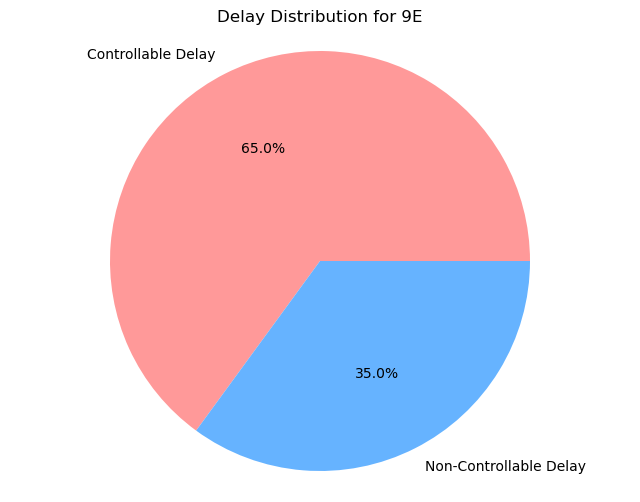

Carrier: G4
Controllable Delay Percentage: 73.21%


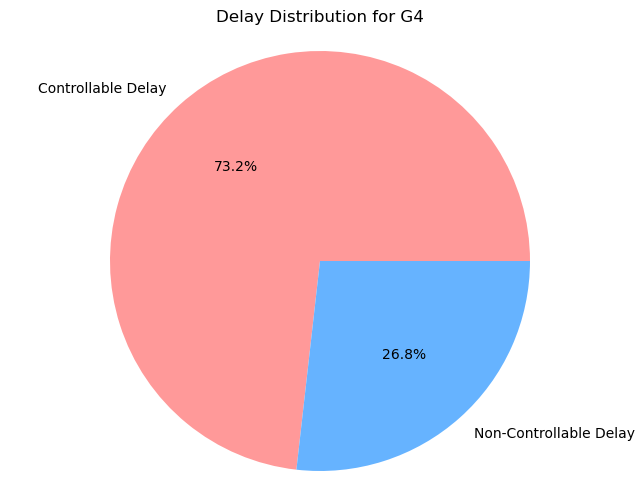

Carrier: MQ
Controllable Delay Percentage: 60.67%


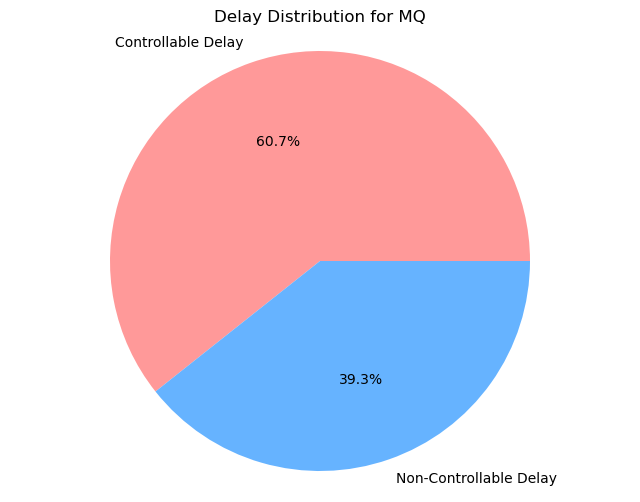

Carrier: OH
Controllable Delay Percentage: 73.31%


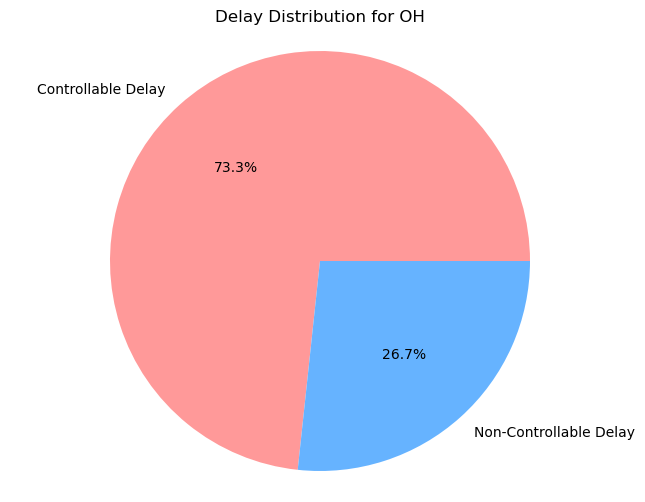

Carrier: OO
Controllable Delay Percentage: 80.75%


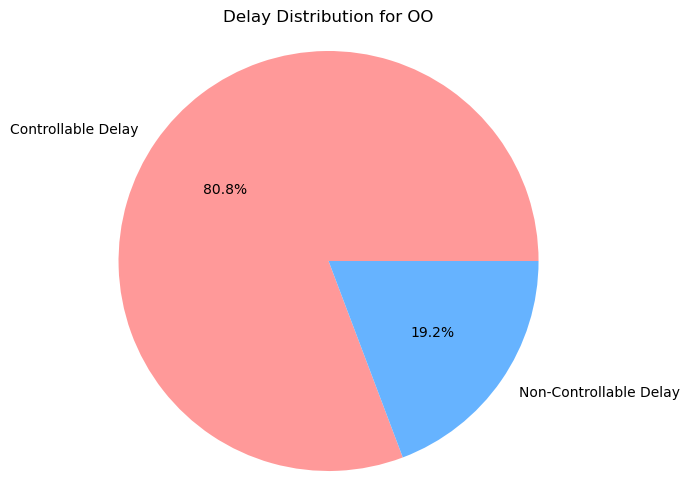

In [10]:
import matplotlib.pyplot as plt

# For top 5 carriers, analyze and visualize controllable vs non-controllable delays
for carrier in df['carrier'].unique()[:5]:
    df_carrier = df[df['carrier'] == carrier]
    controllable_delay = df_carrier['predicted_controllable_delay'].sum()
    total_delay = df_carrier['predicted_arr_delay'].sum()
    
    if total_delay > 0:
        controllable_percentage = (controllable_delay / total_delay) * 100
        non_controllable_percentage = 100 - controllable_percentage
    else:
        controllable_percentage = 0
        non_controllable_percentage = 0

    print(f"Carrier: {carrier}")
    print(f"Controllable Delay Percentage: {controllable_percentage:.2f}%")
    
    # Create data for pie chart
    sizes = [controllable_percentage, non_controllable_percentage]
    labels = ['Controllable Delay', 'Non-Controllable Delay']
    colors = ['#ff9999', '#66b3ff']
    
    # Create pie chart
    plt.figure(figsize=(8, 6))
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
    plt.title(f"Delay Distribution for {carrier}")
    plt.axis('equal')
    plt.show()
    plt.close()